In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
GANANCIA_ACIERTO = 780000
COSTO_ESTIMULO = 20000
def curva_ganancia(experimento: str, test):
    path = f'gs://joaquinrk_data_bukito3/exp/{experimento}/predicciones_test{test}_detallado.csv'
    COSTO_ESTIMULO = 20000
    GANANCIA_ACIERTO = 780000

    df = pd.read_csv(path)

    # Ordenar por probabilidades descendentes
    df = df.sort_values("prob", ascending=False).reset_index(drop=True)

    # Ganancia por individuo
    df["ganancia_individual"] = np.where(
        df["y_true"] == 1,
        GANANCIA_ACIERTO,
        -COSTO_ESTIMULO
    )

    # Curva acumulada
    df["ganancia_acumulada"] = df["ganancia_individual"].cumsum()

    piso_envios = 4000
    techo_envios =20000

    segmento = df["ganancia_acumulada"].iloc[piso_envios:techo_envios]

    plt.figure(figsize=(12,6))
    plt.plot(range(piso_envios, techo_envios), segmento)
    plt.grid(True)
    plt.title("Curva de ganancia (segmento)")
    plt.xlabel("Top-k envíos")
    plt.ylabel("Ganancia acumulada")
    plt.show()

def detalles(experimento, test):
    path = f'gs://joaquinrk_data_bukito3/exp/{experimento}/predicciones_test{test}_detallado.csv'

    df = pd.read_csv(path)

    # Ordenar por probabilidades descendentes
    df = df.sort_values("prob", ascending=False).reset_index(drop=True)

    # Ganancia por individuo
    df["ganancia_individual"] = np.where(
        df["y_true"] == 1,
        GANANCIA_ACIERTO,
        -COSTO_ESTIMULO
    )

    # Curva acumulada
    df["ganancia_acumulada"] = df["ganancia_individual"].cumsum()
    piso_envios = 4000
    techo_envios = 20000  # exclusivo

    gan_cum = df["ganancia_acumulada"].to_numpy()

    # segmento solo entre piso y techo
    curva_segmento = gan_cum[piso_envios:techo_envios]

    argmax_local = int(np.argmax(curva_segmento))
    k_mejor = int(piso_envios + argmax_local)      # igual que en tu función
    ganancia_max = float(curva_segmento[argmax_local])

    prob_umbral = float(df.loc[k_mejor - 1, "prob"])

    print("K óptimo (segmento):", k_mejor)
    print("Ganancia máxima segmento:", ganancia_max)
    print("Probabilidad umbral:", prob_umbral)


In [47]:
def analizar_curvas(experimento):
    paths = {
        'abril': 1,
        'junio': 2}
    print('=' * 50)
    print(experimento)
    print('=' * 50)
    for mes, test in paths.items():

        print(f'Mes testeo {mes}')
        curva_ganancia(experimento, test)
        detalles(experimento,test)


apo-506_20251115_024932
Mes testeo abril


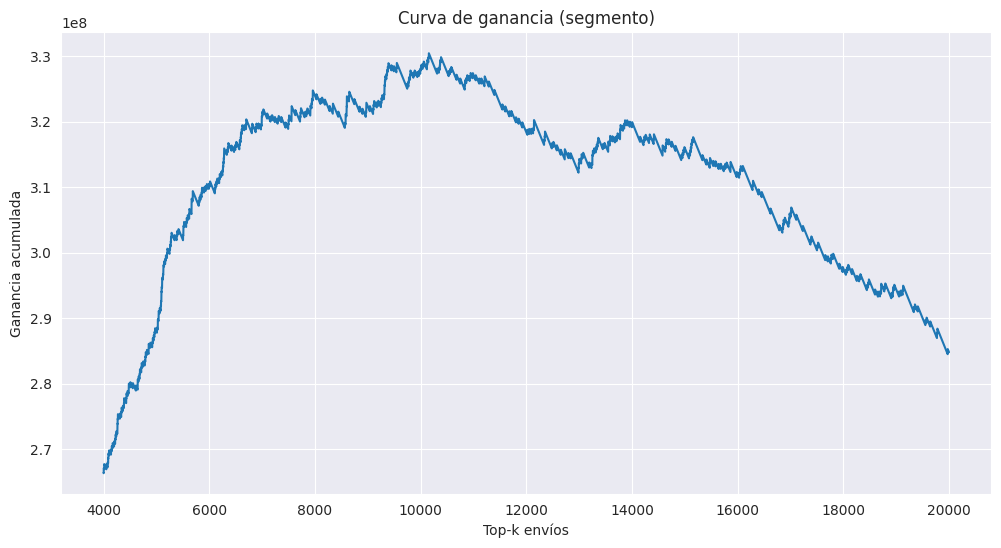

K óptimo (segmento): 10156
Ganancia máxima segmento: 330460000.0
Probabilidad umbral: 0.1110163698081618
Mes testeo junio


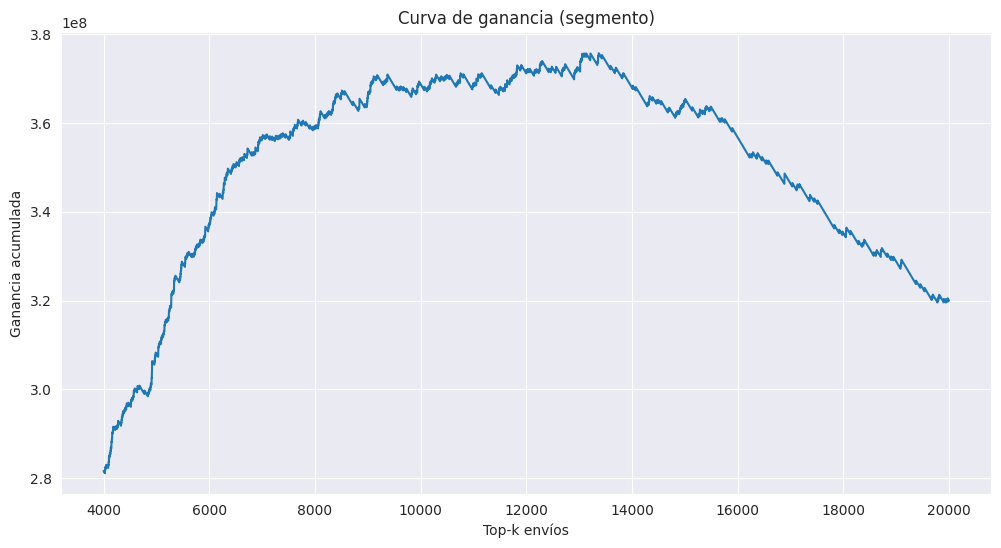

K óptimo (segmento): 13371
Ganancia máxima segmento: 375760000.0
Probabilidad umbral: 0.0739297343606373
apo-506_20251115_045042
Mes testeo abril


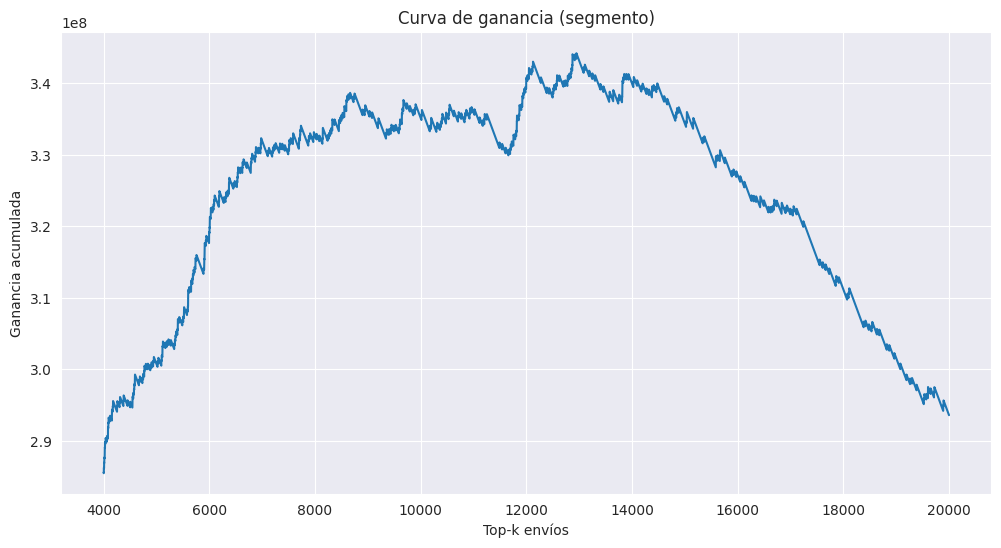

K óptimo (segmento): 12948
Ganancia máxima segmento: 344220000.0
Probabilidad umbral: 0.08686775658458
Mes testeo junio


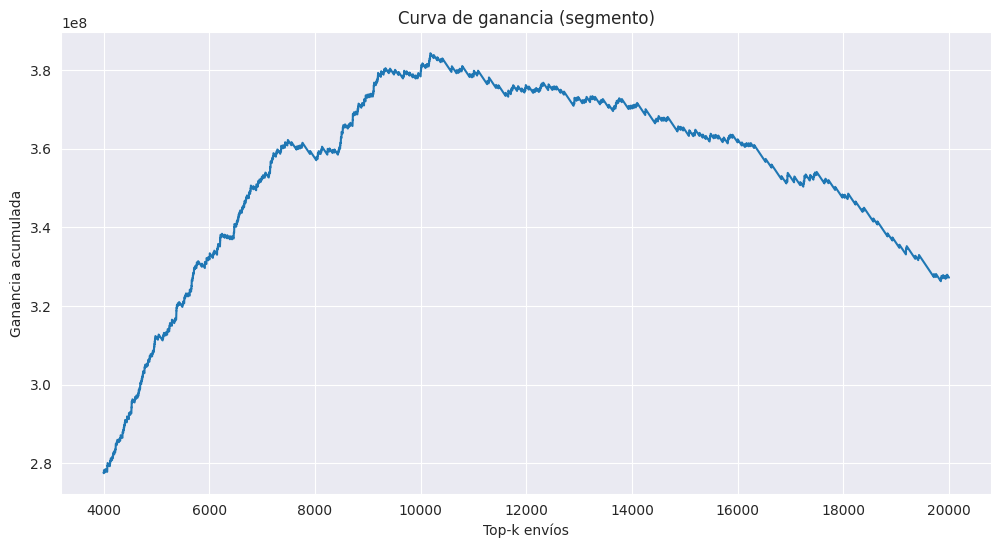

K óptimo (segmento): 10185
Ganancia máxima segmento: 384280000.0
Probabilidad umbral: 0.1045574133072213
apo-506_20251115_073523
Mes testeo abril


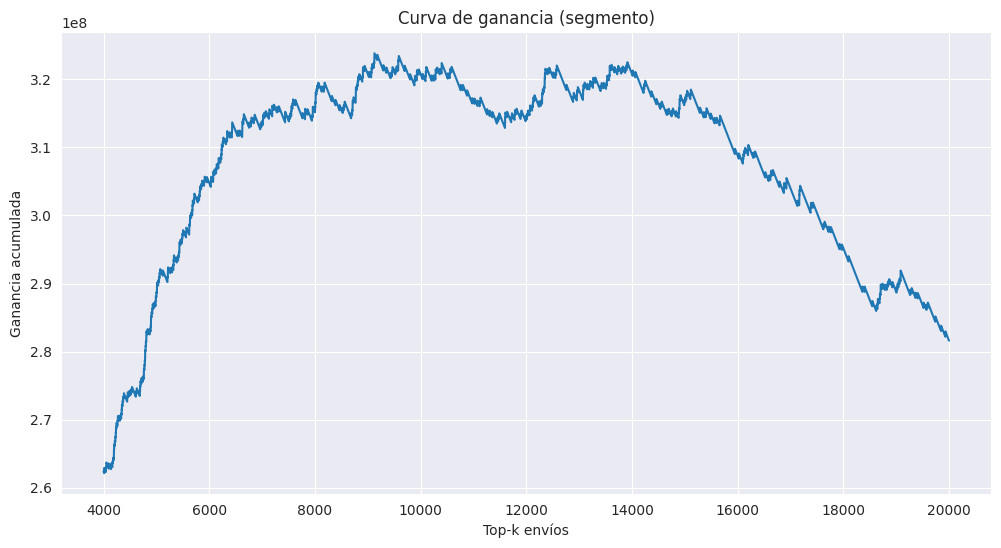

K óptimo (segmento): 9127
Ganancia máxima segmento: 323840000.0
Probabilidad umbral: 0.1249512804103769
Mes testeo junio


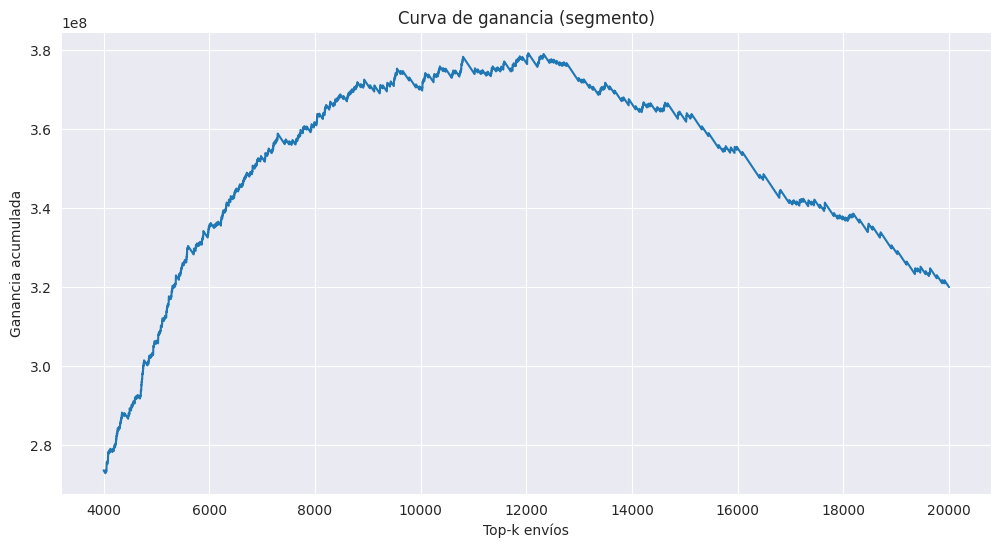

K óptimo (segmento): 12037
Ganancia máxima segmento: 379240000.0
Probabilidad umbral: 0.0830601370665993
apo-506_20251115_095708
Mes testeo abril


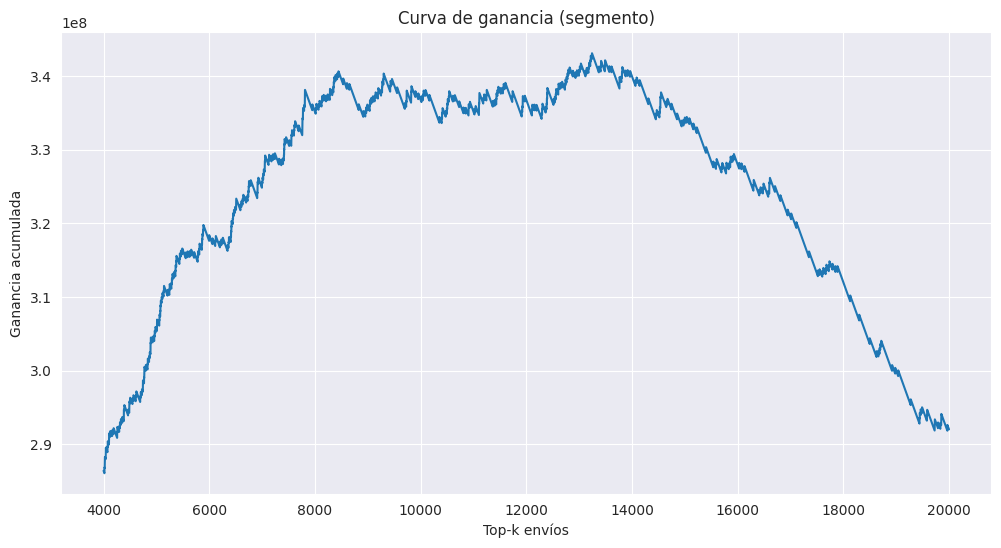

K óptimo (segmento): 13243
Ganancia máxima segmento: 343120000.0
Probabilidad umbral: 0.0852857139405198
Mes testeo junio


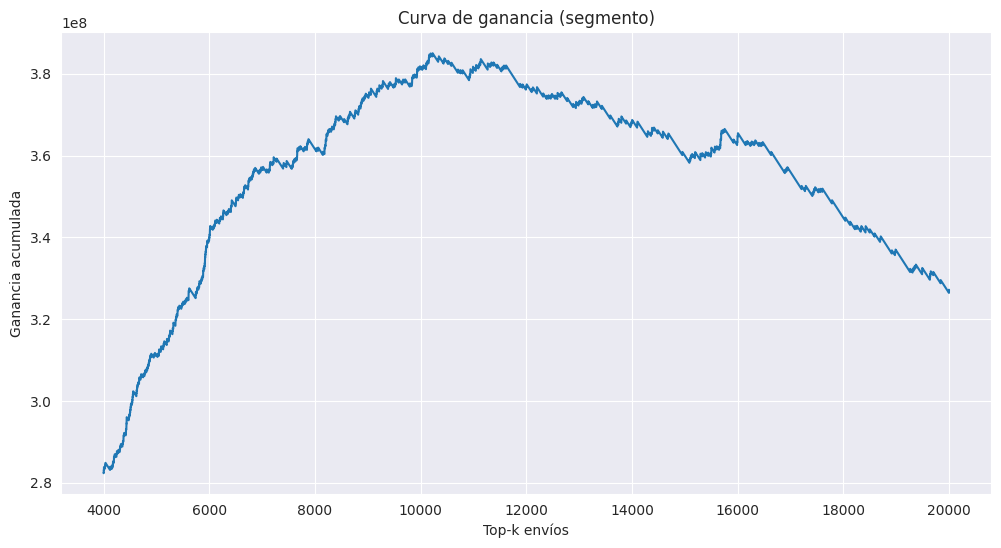

K óptimo (segmento): 10227
Ganancia máxima segmento: 385040000.0
Probabilidad umbral: 0.1034228932663071
EXPERIMENTO_NO_ESTACIONAL_ZLGBM_20251115_200455
Mes testeo abril


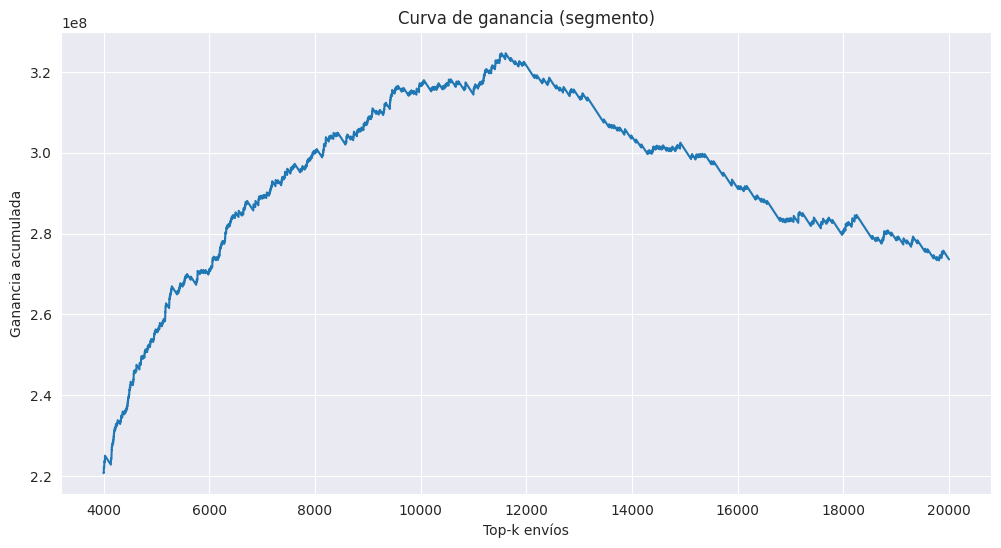

K óptimo (segmento): 11528
Ganancia máxima segmento: 324620000.0
Probabilidad umbral: 0.0877557236984313
Mes testeo junio


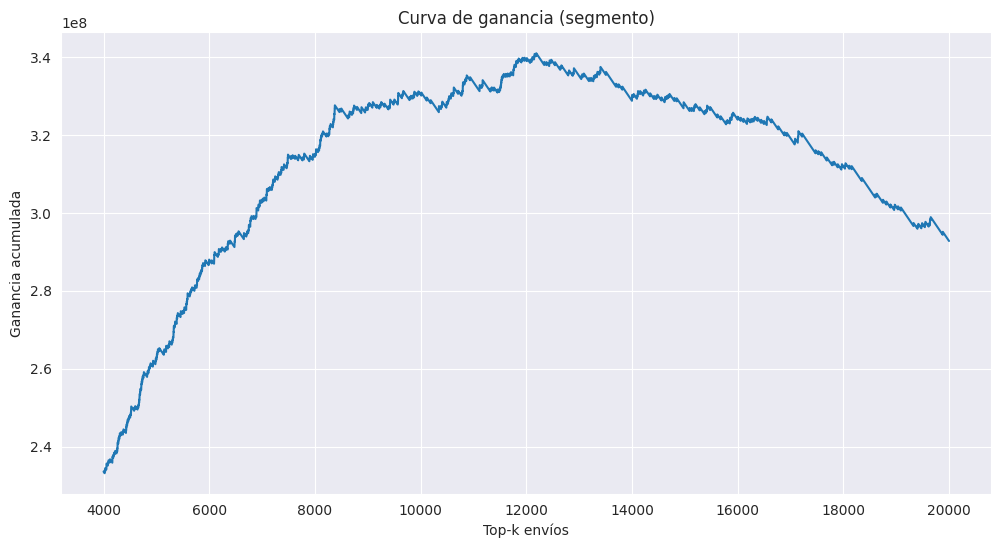

K óptimo (segmento): 12188
Ganancia máxima segmento: 341020000.0
Probabilidad umbral: 0.0778568497588405


In [48]:
experimentos = ['apo-506_20251115_024932','apo-506_20251115_045042','apo-506_20251115_073523','apo-506_20251115_095708','EXPERIMENTO_NO_ESTACIONAL_ZLGBM_20251115_200455']

for e in experimentos:
    analizar_curvas(e)

ESTACIONAL abril: sin campos encontrados en PSI + campos momentums delta.


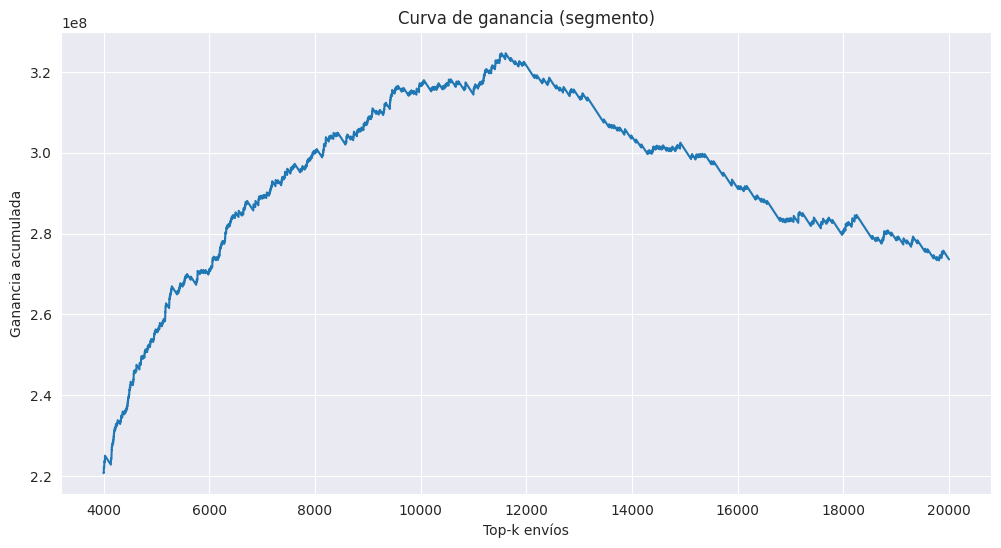

K óptimo (segmento): 11528
Ganancia máxima segmento: 324620000.0
Probabilidad umbral: 0.0877557236984313
ESTACIONAL junio: sin campos encontrados en PSI + campos momentums delta.


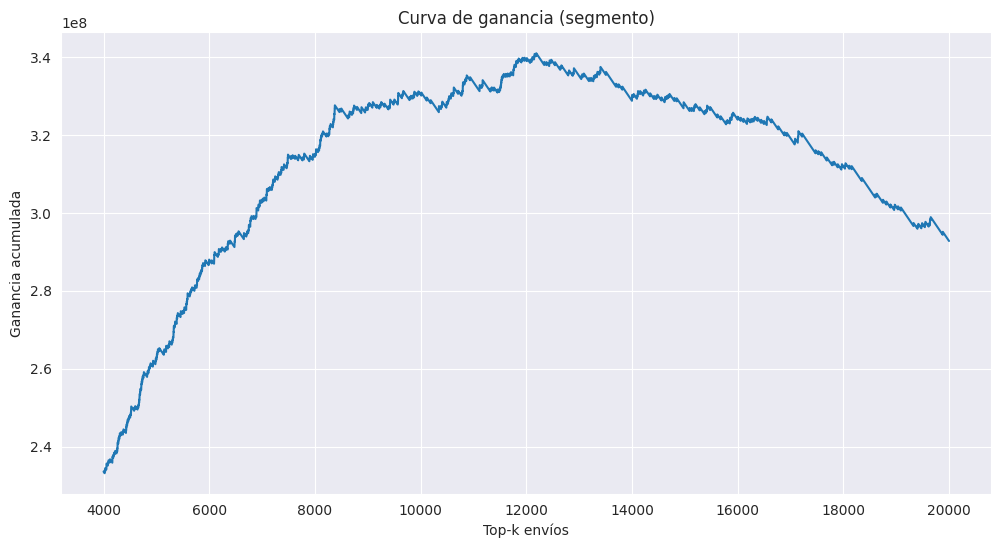

K óptimo (segmento): 12188
Ganancia máxima segmento: 341020000.0
Probabilidad umbral: 0.0778568497588405


In [25]:
# Experimento sin estacionalidad, eliminando features PSI y calculando moemntum par aotras
analizar_curvas('EXPERIMENTO_NO_ESTACIONAL_ZLGBM_20251115_200455')

Estacional abril: Sin campos Visa y Master mfinanciamiento.


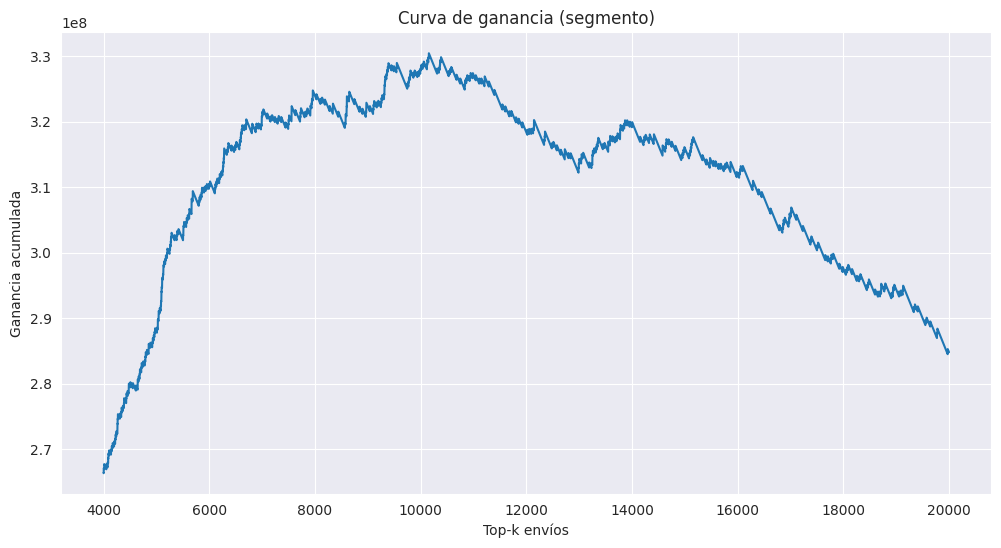

K óptimo (segmento): 10156
Ganancia máxima segmento: 330460000.0
Probabilidad umbral: 0.1110163698081618
Estacional junio: Sin campos Visa y Master mfinanciamiento.


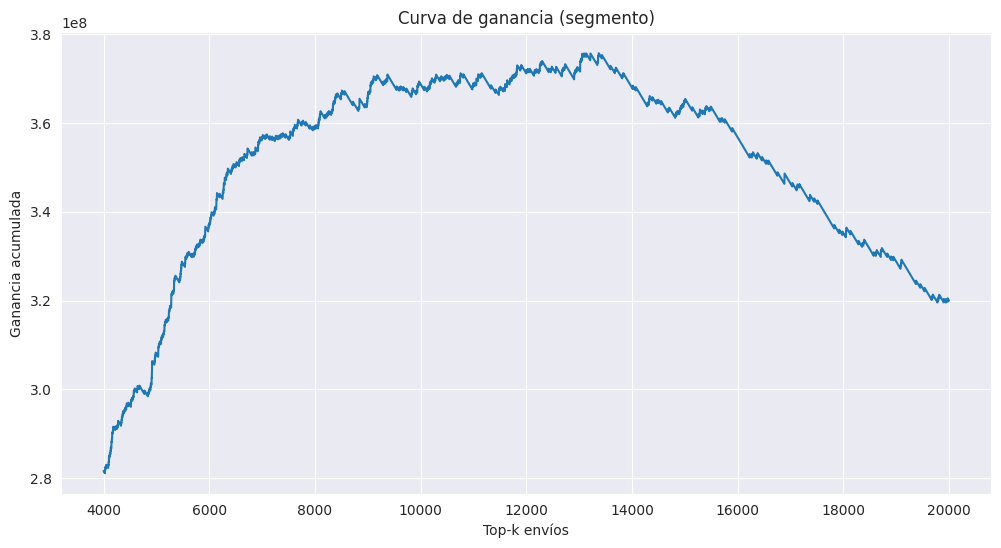

K óptimo (segmento): 13371
Ganancia máxima segmento: 375760000.0
Probabilidad umbral: 0.0739297343606373


In [10]:
# sin estacionalidad, sin visa master mfinanciamento
paths ={'abril':r'/home/joacosk/Documents/maestria/Q2/experimentos/apo-506_20251115_024932/predicciones_test1_detallado.csv',
        'junio': r'/home/joacosk/Documents/maestria/Q2/experimentos/apo-506_20251115_024932/predicciones_test2_detallado.csv'}
for mes, path in paths.items():
    print(f'Estacional {mes}: Sin campos Visa y Master mfinanciamiento.')
    curva_ganancia(path)
    detalles(path)

abril: CON campos Visa y Master mfinanciamiento.


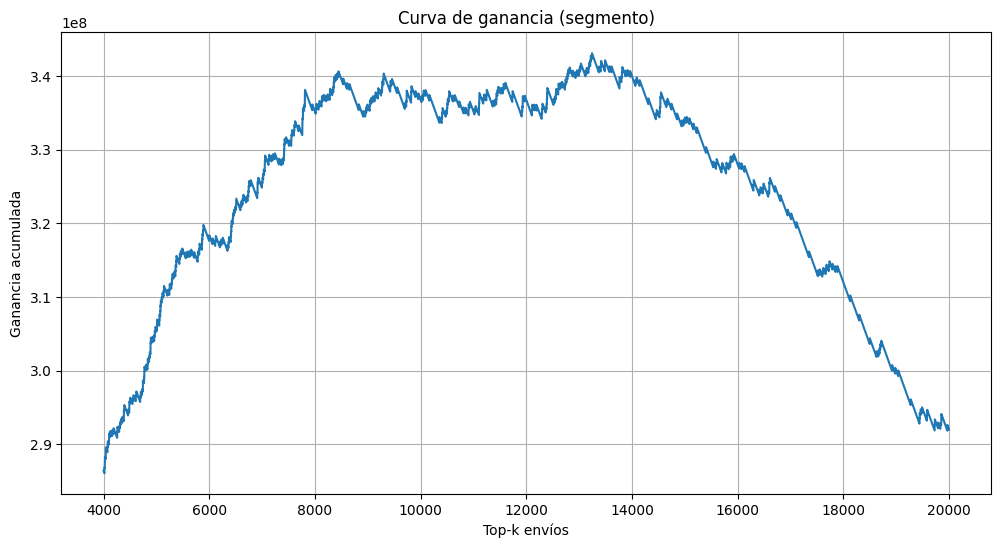

K óptimo (segmento): 13243
Ganancia máxima segmento: 343120000.0
Probabilidad umbral: 0.0852857139405198
junio: CON campos Visa y Master mfinanciamiento.


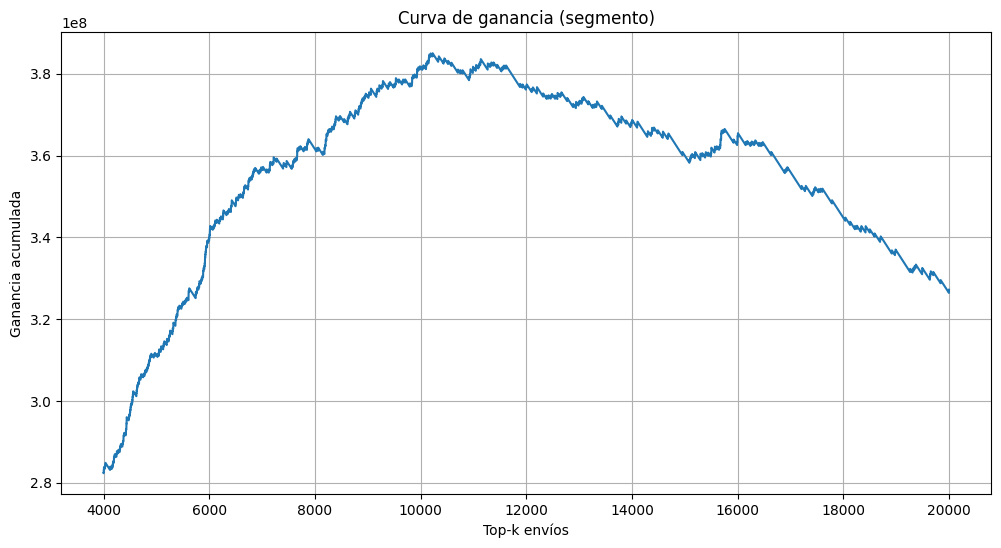

K óptimo (segmento): 10227
Ganancia máxima segmento: 385040000.0
Probabilidad umbral: 0.1034228932663071


In [51]:
# sin estacionalidad, sin visa master mfinanciamento
paths ={'abril':r'C:\Users\sopor\OneDrive\Documentos\Maestria\2_Cuatrimestre\DMEyF\competencia2\exp\apo-506_20251115_095708_sin_estacionalidad\predicciones_test1_detallado.csv',
        'junio': r'C:\Users\sopor\OneDrive\Documentos\Maestria\2_Cuatrimestre\DMEyF\competencia2\exp\apo-506_20251115_095708_sin_estacionalidad\predicciones_test2_detallado.csv'}
for mes, path in paths.items():
    print(f'{mes}: CON campos Visa y Master mfinanciamiento.')
    curva_ganancia(path)
    detalles(path)

ESTACIONAL abril: sin campos encontrados en PSI + campos momentums delta.


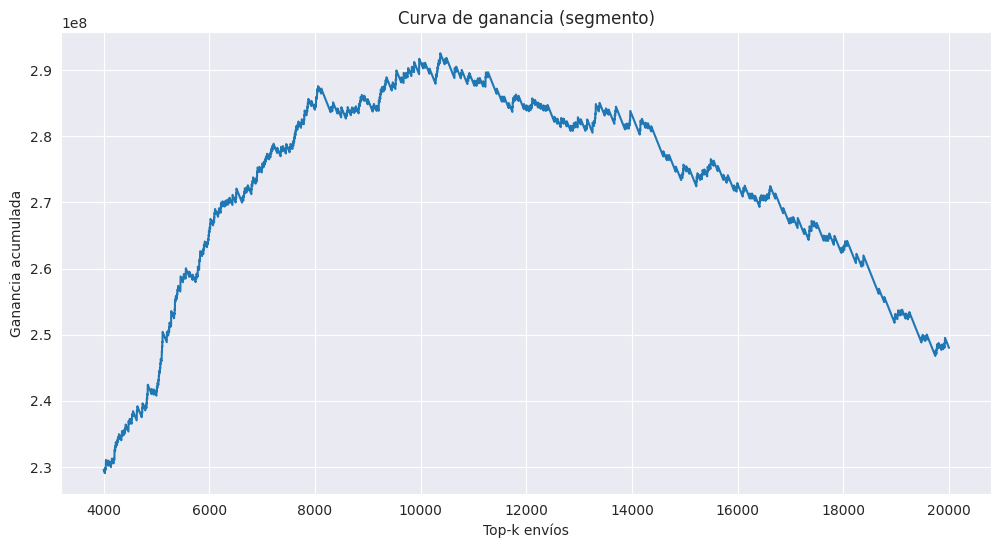

K óptimo (segmento): 10372
Ganancia máxima segmento: 292540000.0
Probabilidad umbral: 0.0967761508961499
ESTACIONAL junio: sin campos encontrados en PSI + campos momentums delta.


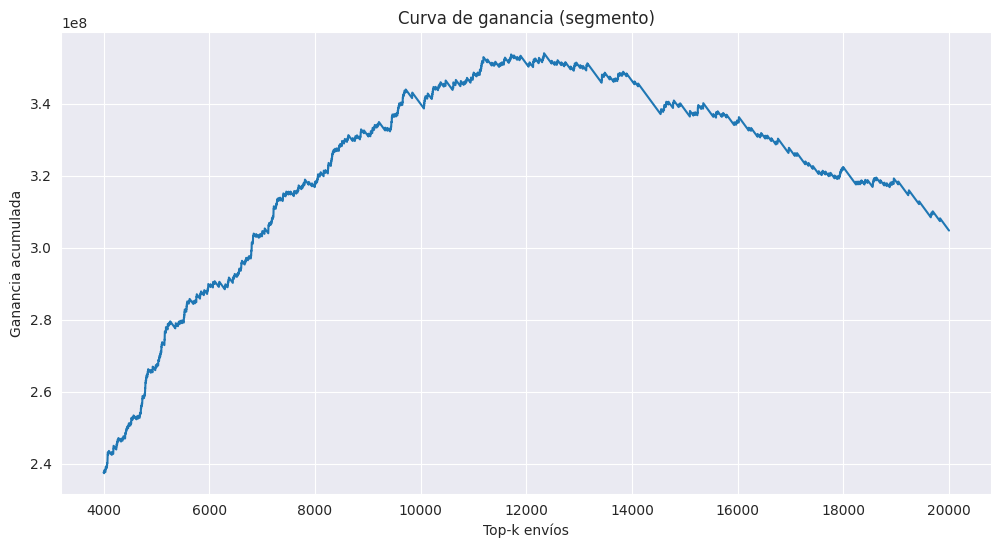

K óptimo (segmento): 12335
Ganancia máxima segmento: 354080000.0
Probabilidad umbral: 0.0744661775857328


In [7]:
paths = {
    'abril': r'/home/joacosk/Documents/maestria/Q2/EXPERIMENTO_ESTACIONAL_ZLGBM_20251115_185349/predicciones_test1_detallado.csv',
    'junio': r'/home/joacosk/Documents/maestria/Q2/EXPERIMENTO_ESTACIONAL_ZLGBM_20251115_185349/predicciones_test2_detallado.csv'}
for mes, path in paths.items():
    print(f'ESTACIONAL {mes}: sin campos encontrados en PSI + campos momentums delta.')
    curva_ganancia(path)
    detalles(path)


## Feature Importance

In [50]:
import gcsfs
import lightgbm as lgb
import pandas as pd
from tqdm import tqdm
fs = gcsfs.GCSFileSystem()

def cargar_importancias_modelos_gcs(exp_name):
    pattern = f'joaquinrk_data_bukito3/exp/{exp_name}/modelos/*.txt'
    modelos_paths = fs.glob(pattern)
    print("Modelos encontrados:", len(modelos_paths))
    df_todos = []

    for path in tqdm(modelos_paths, f'Cargando modelos experimento {exp_name}'):
        gcs_path = f'gs://{path}'
        #print("Leyendo modelo:", gcs_path)
        with fs.open(path, 'rb') as f:
            model_str = f.read().decode('utf-8')
        modelo = lgb.Booster(model_str=model_str)
        feature_names = modelo.feature_name()
        importance_gain = modelo.feature_importance(importance_type="gain")

        df = pd.DataFrame({
            "feature": feature_names,
            "gain": importance_gain,
            "modelo": os.path.basename(path)
        })
        df_todos.append(df)

    return pd.concat(df_todos, ignore_index=True)


In [51]:
df_importancias = cargar_importancias_modelos_gcs('apo-506_20251115_095708')

df_importancia_media = (
    df_importancias.groupby("feature")["gain"]
    .mean()
    .sort_values(ascending=False)
)

#df_importancia_media.to_csv(os.path.join(exp_path, "feature_importance_promedio.csv"))


Modelos encontrados: 100


Cargando modelos experimento apo-506_20251115_095708: 100%|██████████| 100/100 [02:47<00:00,  1.68s/it]


In [52]:
df_importancia_media

feature
ctrx_quarter                     930150.646667
ctrx_quarter_lag_1               145381.375004
mtarjeta_visa_consumo             94514.146298
cpayroll_trx                      89805.729910
mcaja_ahorro                      77941.063297
                                     ...      
cprestamos_hipotecarios_lag_1         0.000000
cprestamos_hipotecarios_lag_2         0.000000
cprestamos_prendarios                 0.000000
mforex_buy                            0.000000
cpayroll2_trx                         0.000000
Name: gain, Length: 770, dtype: float64

In [42]:
df_importancia_media.to_csv('/home/joacosk/Documents/maestria/Q2/script_project/output/feature_importance_promedio_EXPERIMENTO_NO_ESTACIONAL_ZLGBM_20251115_200455.csv')